In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from imblearn.over_sampling import SMOTE

%matplotlib inline

In [15]:
df = pd.read_csv('chronic_kidney_disease.csv')

In [16]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [17]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [19]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [20]:
df = df.drop(columns=['rbc', 'wbcc', 'rbcc'], axis=1)

In [21]:
numeric_col = ['age', 'bp', 'sg', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv']
category_col = ['al', 'su', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

In [22]:
for i in category_col:
    print(i, df[i].mode()[0])

al 0.0
su 0.0
pc normal
pcc notpresent
ba notpresent
htn no
dm no
cad no
appet good
pe no
ane no
class ckd


In [23]:
for col in numeric_col:
    df[col] = df[col].fillna(df[col].mean())

In [24]:
for col in category_col:
    df[col] = df[col].fillna(df[col].mode()[0])

In [25]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

# Visualization

plot numeric columns:

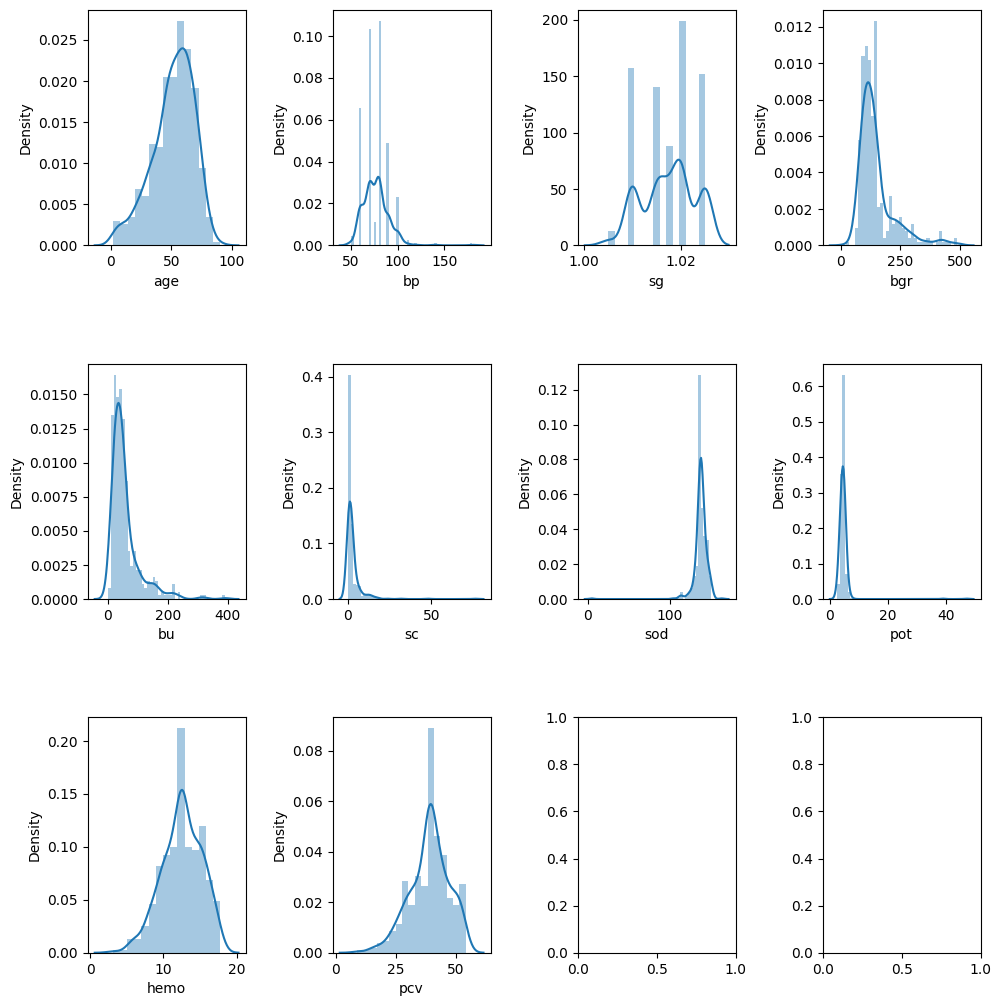

In [58]:
import warnings
warnings.filterwarnings('ignore')
# create dist plot
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(10,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col in numeric_col:
        sns.distplot(value, ax=ax[index])
        index += 1  
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

plot categorical columns:

histogram of the target column:

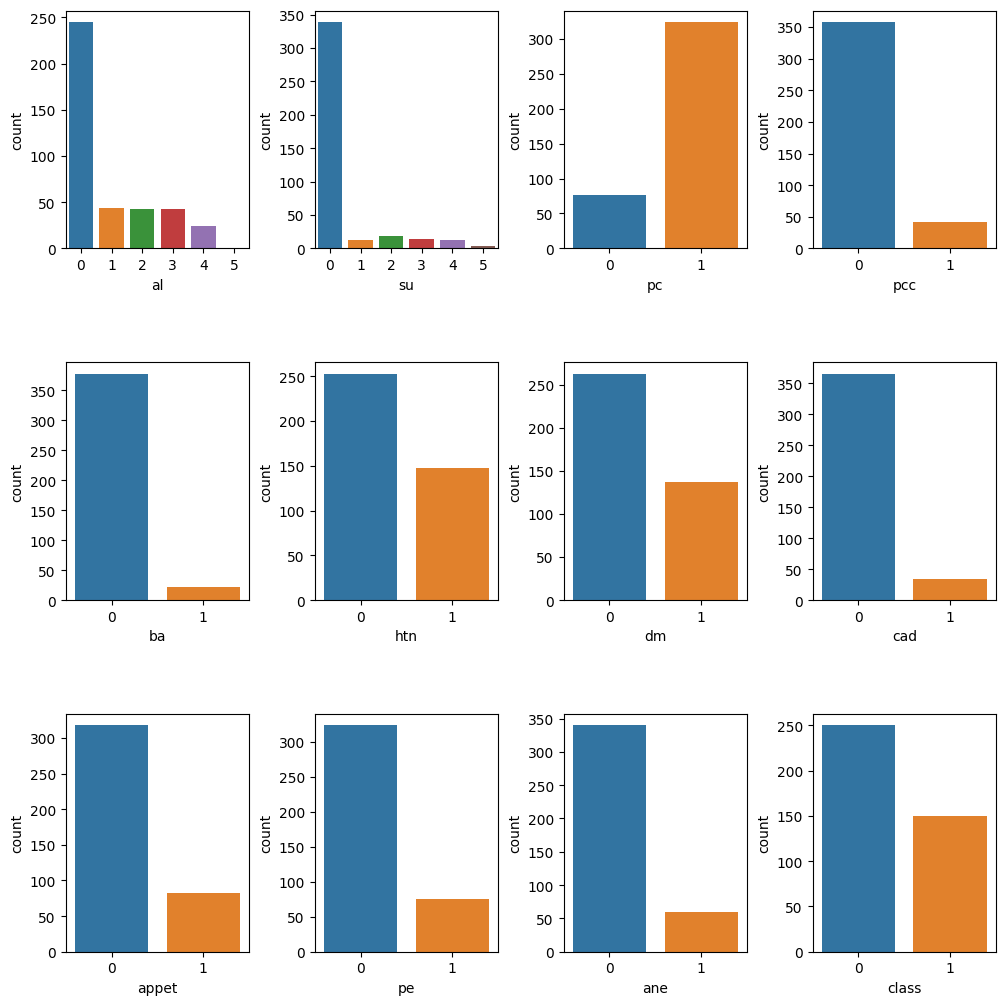

In [60]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(10,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col in category_col:
        sns.countplot(x=col, data=df, ax=ax[index])
        index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Heatmap:

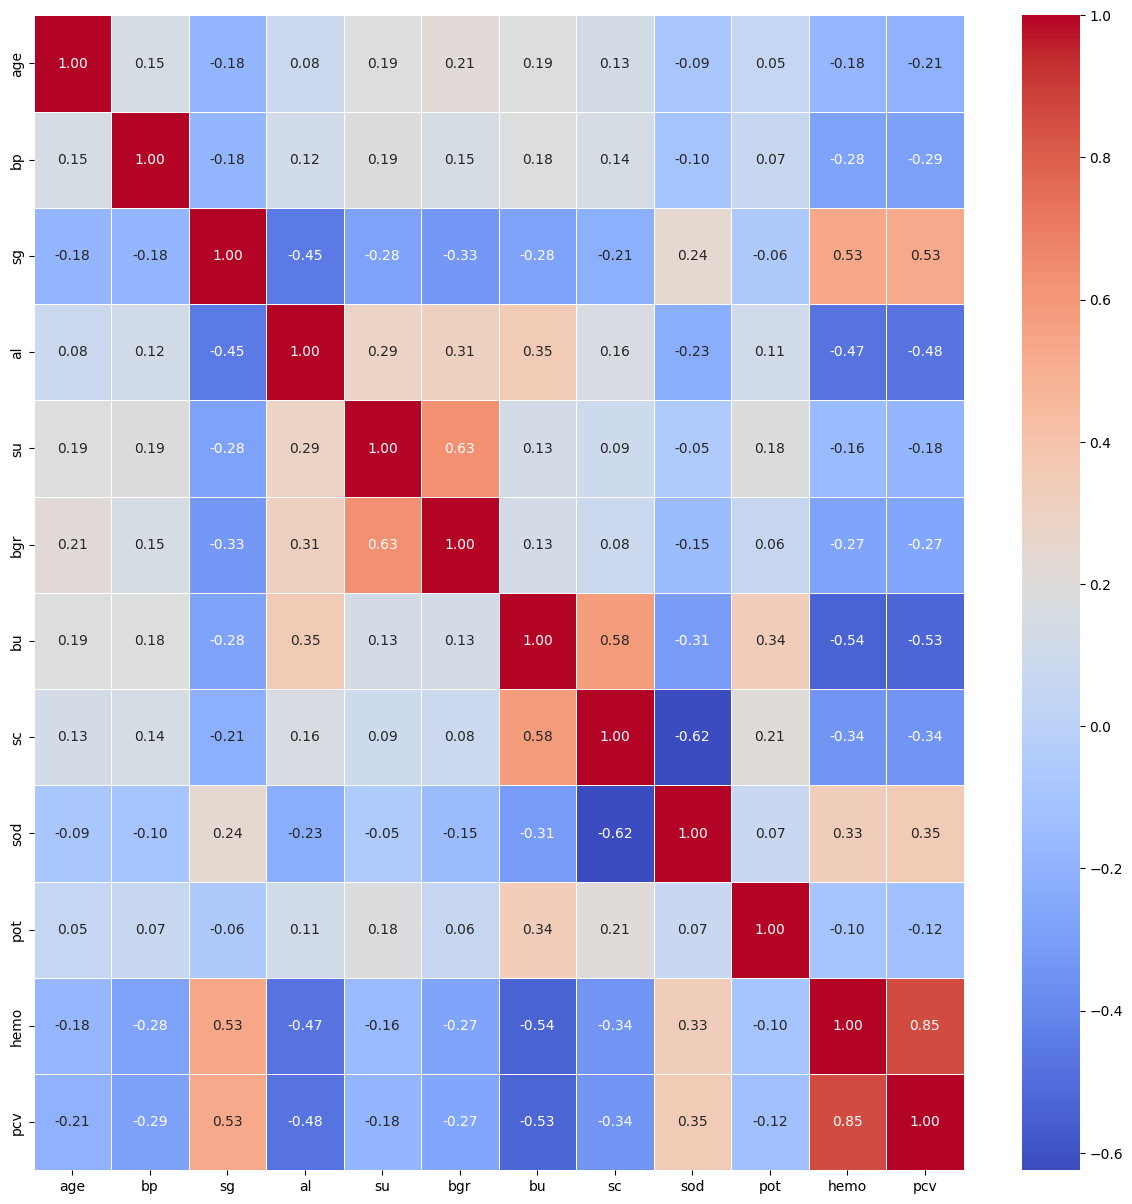

In [31]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5, cmap="coolwarm")
plt.show()

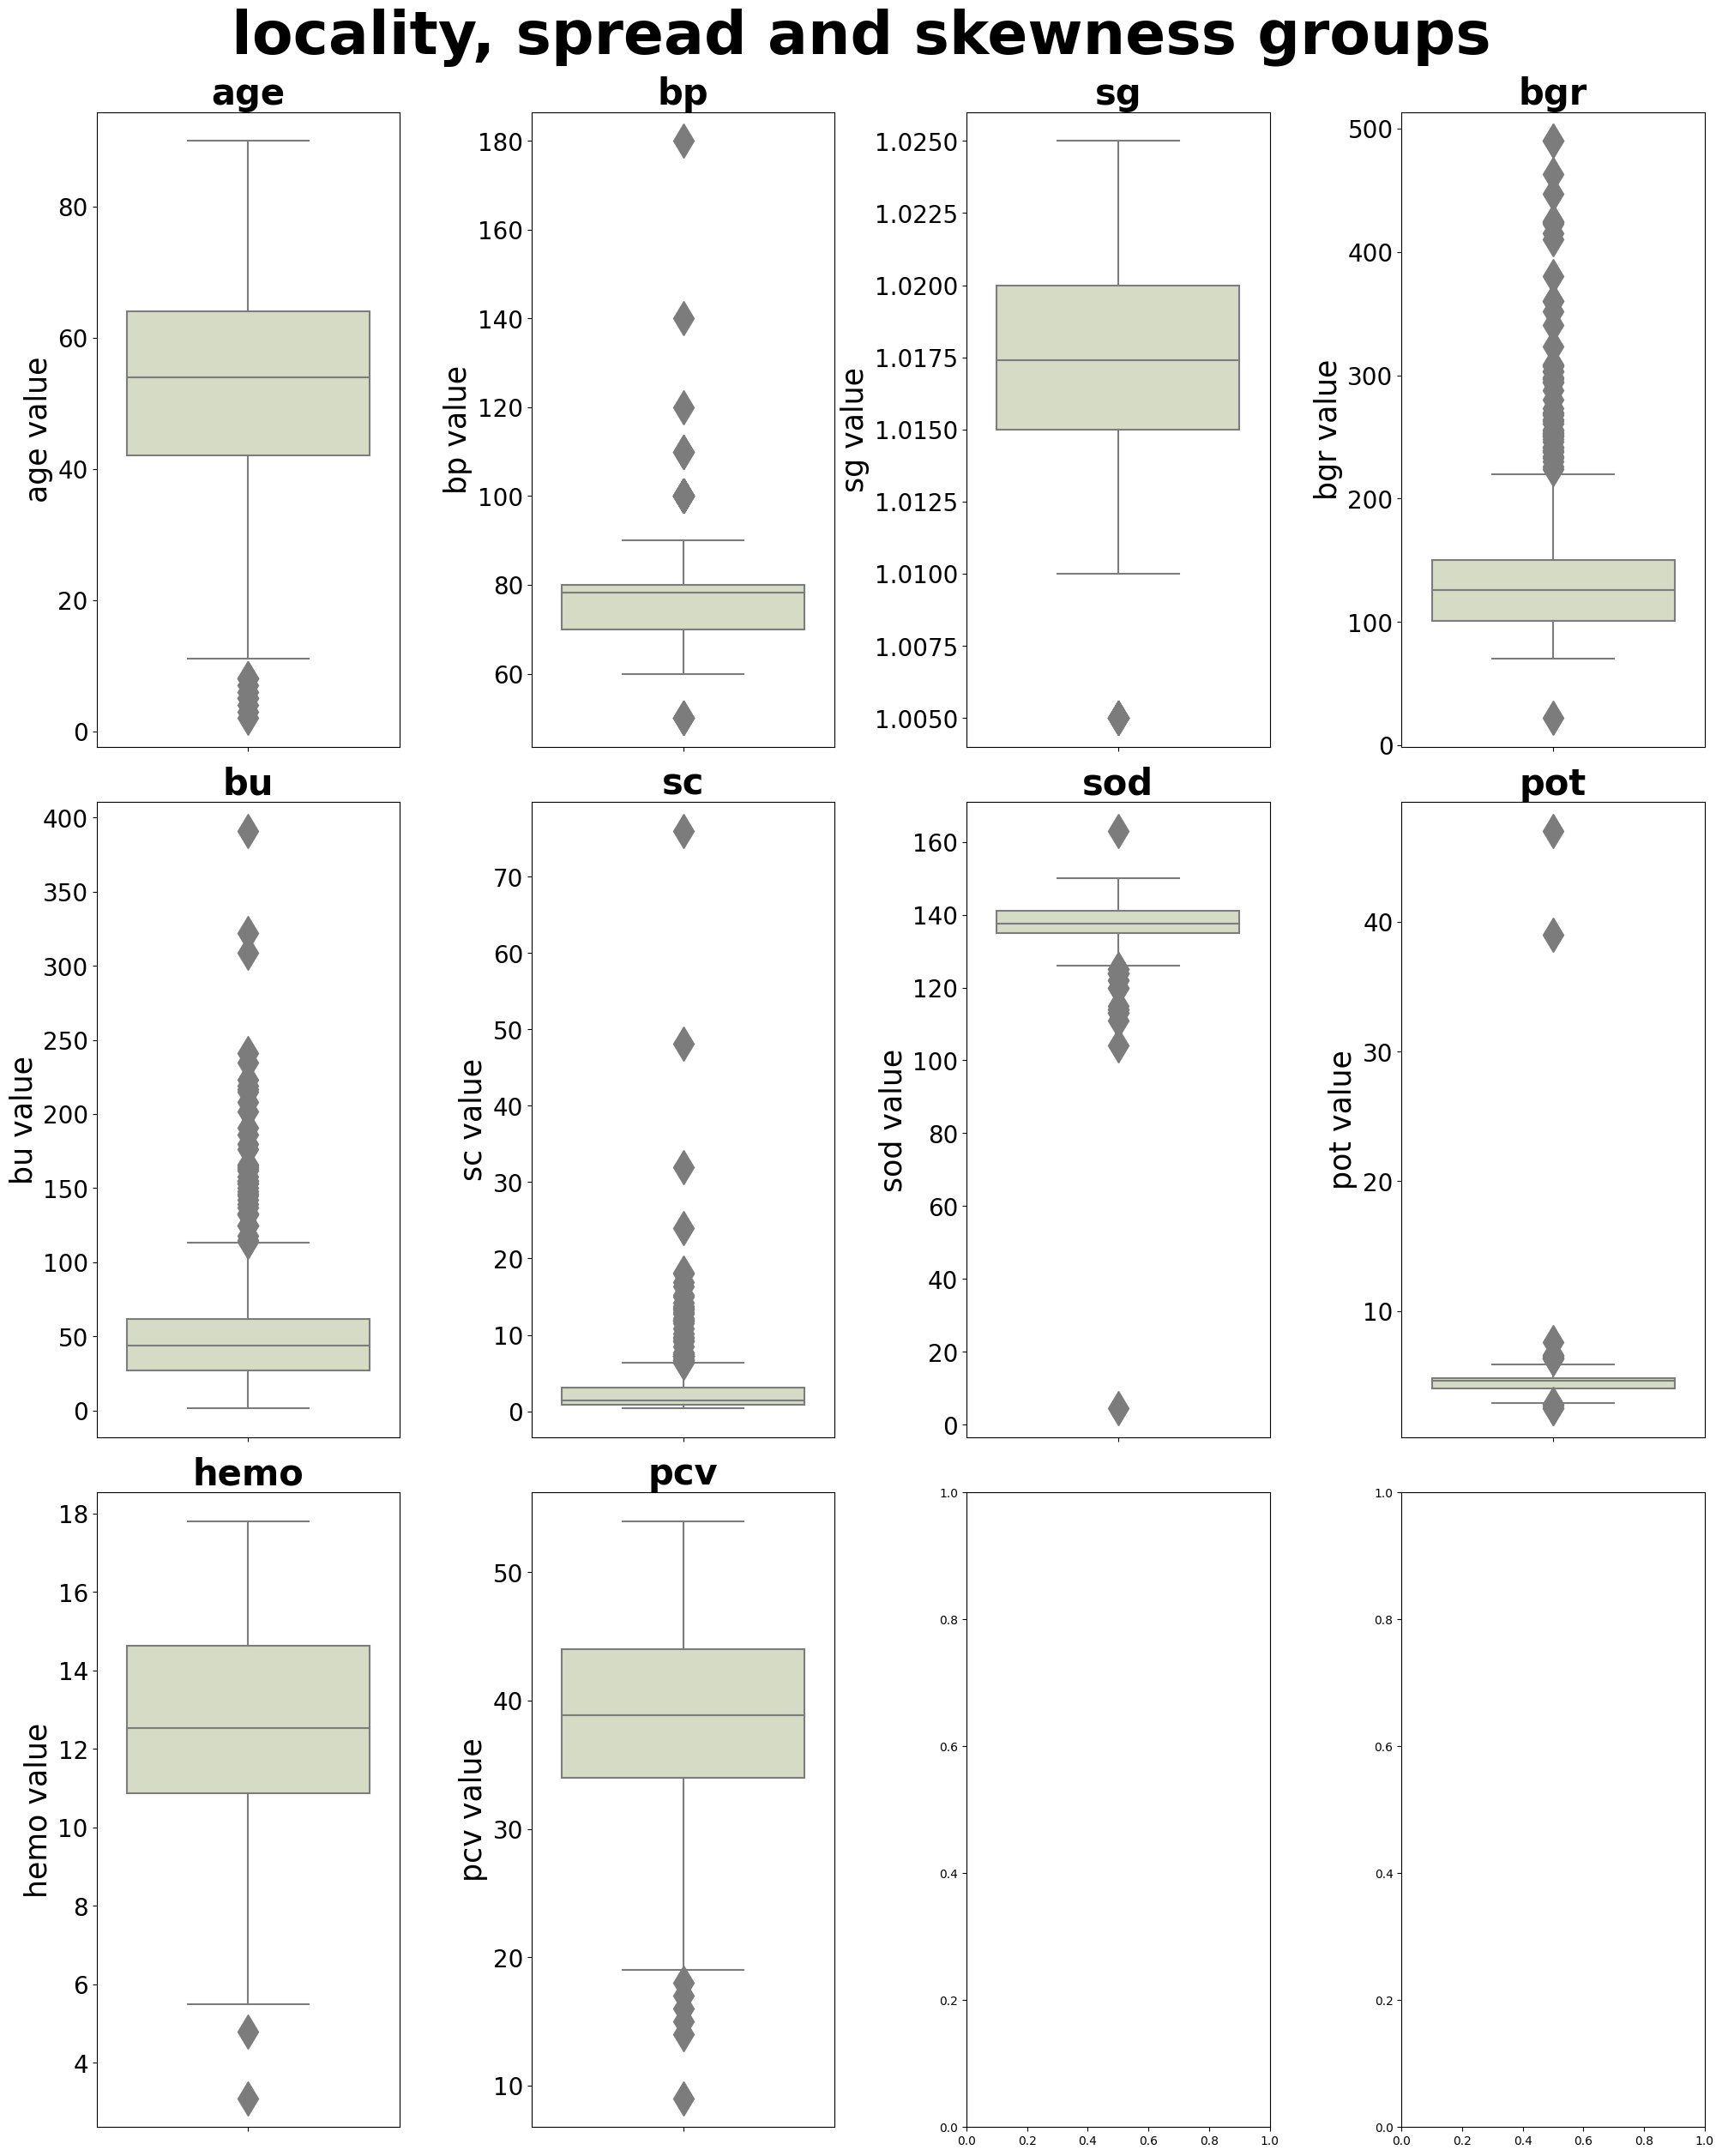

In [63]:
base_plate = sns.cubehelix_palette(start=.5, rot=-.75,)

fig, axs = plt.subplots(ncols = 4, nrows = 3, figsize = (20,25))
figure_title = "locality, spread and skewness groups" 
plt.suptitle(figure_title, y=1.00,fontsize=50,fontweight="bold")
idx = 0
axs = axs.flatten()
for k, v in df.items():  
    if k in numeric_col:
        b=sns.boxplot(y = k, data = df, ax = axs[idx],palette=base_plate,fliersize=20)
        b.set_ylabel(f"{k} value",fontsize=25)
        b.tick_params(labelsize=20)
        axs[idx].set_title(k,fontsize = 30,fontweight="bold")
        idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 0.5)

convert categorical values to numbers

In [34]:
le = LabelEncoder()

for col in category_col:
    df[col] = le.fit_transform(df[col])

## split data set to train and validation

In [105]:
x = df.drop(columns=['class'], axis=1)
y = train = df['class']

oversample = SMOTE(k_neighbors=4)
# transform the dataset
x, y = oversample.fit_resample(x, y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Classification

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.99
Precision: 1.0
Recall: 0.9814814814814815
F1 score: 0.9906542056074767
ROC-AUC score: 0.9907407407407407


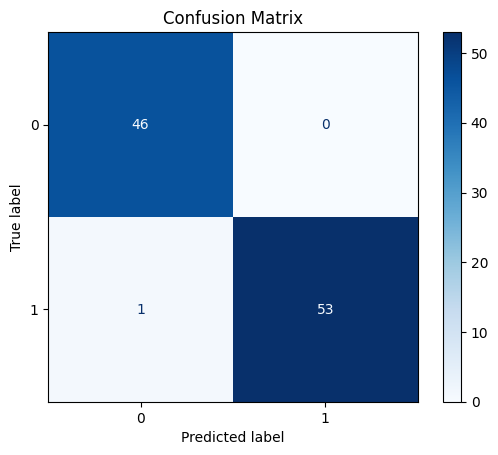

In [97]:

y_prob = dt.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [114]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC-AUC score: 1.0


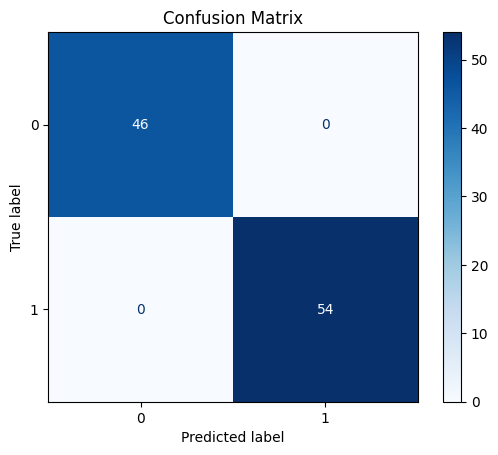

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
y_prob = rf.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## plot decision tree

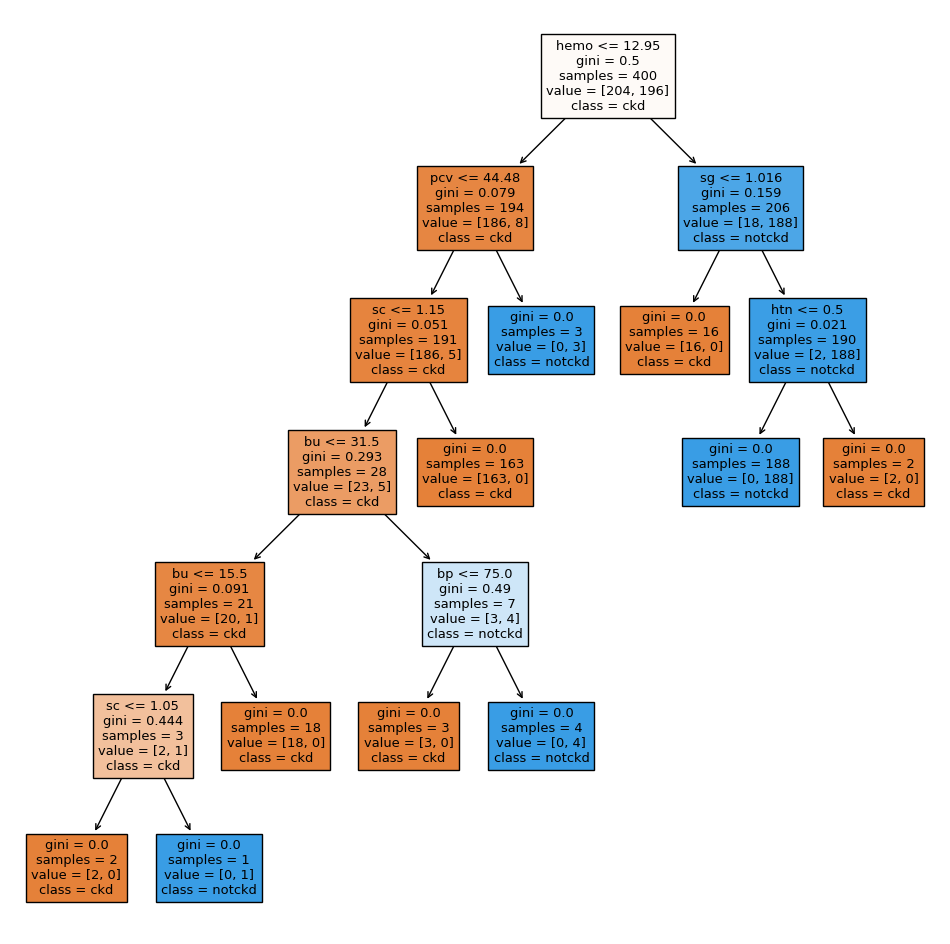

In [107]:
fig, ax = plt.subplots(figsize=(12, 12))
_ = tree.plot_tree(dt, filled=True, ax=ax, feature_names=x.columns, class_names=cn)
plt.show()

## Bonus models

In [119]:
#Logistic Rergression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
#print(cv)
print(cv.mean())

#Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv.mean())


#K neighbors
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv.mean())

#Xtreme Gradient Boosting
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv.mean())

#Soft Voting classifier
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv.mean())

0.97
0.975
0.89
0.9824999999999999
0.86


## grid search

In [108]:
import graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV , StratifiedShuffleSplit
from sklearn.metrics import classification_report

feature_names = [k for k in X_train.keys()]

def plot_Tree_graph(tree_model,features_train, labels_train,features):
    # DOT data
    data_print = tree.export_graphviz(tree_model, out_file=None, 
                                     proportion=True,
                                feature_names=features,
                                class_names = class_names,
                                filled=True)
    # Draw graph
    dot_data = graphviz.Source(data_print, format="png")
    
    dot_data.render(filename='./imagesAndPDF/cart_tree.png',view=True,format='png')
    return dot_data
    
    
    
# cross-validation with 10 splits
cv = StratifiedShuffleSplit(n_splits=10, random_state = 0, test_size=0.3)

    
# CART decision tree
cart = tree.DecisionTreeClassifier(random_state = 0)

# parameters 

parameters = {
                "criterion": ["gini","entropy"],
                "splitter": ["best","random"],
                }

# grid search for parameters
grid_1 = GridSearchCV(estimator=cart, param_grid=parameters, cv=cv, n_jobs=1)
grid_1 = grid_1.fit(X_train, y_train)
# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_1.best_params_, grid_1.best_score_))

# prediction results
y_pred_cart = grid_1.predict(X_test)
print(classification_report(y_test, y_pred_cart))
class_names =[ x for x in grid_1.classes_]
#plot_Tree_graph(grid_1.best_estimator_,X_train,y_train,feature_names)

The best parameters are {'criterion': 'entropy', 'splitter': 'random'} with a score of 0.9833
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.96      1.00      0.98        54

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

